In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = np.loadtxt('wars.txt', delimiter='\t', skiprows=1, dtype=[('label', '<U12'), ('value', '<f8')])
#print(data)

points=[]
for d in data:
    points.append(d[1])

WYKRESY

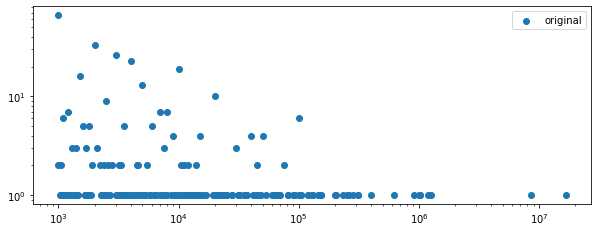

In [3]:
histo = dict()
for v in points:
    if v in histo.keys():
        histo[v] = histo[v]+1
    else:
        histo[v]=1

mylistv = [key for key, val in histo.items() for _ in range(val)]
xs=list(histo.keys())
ys=list(histo.values())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(2, 1, 1)
ax.scatter(xs,ys,label='original')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

1000.0 8316.954
[346, 54, 27, 9, 9, 9, 1, 5, 5, 2, 1, 8, 3, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


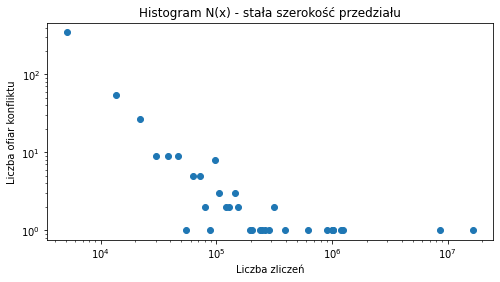

In [4]:
N=2000
p_range=max(points)-min(points)+1
delta_x=p_range/N
x0=min(points)
print(x0,delta_x)

wonky=[]
for i in range(N):
    wonky.append([x0+i*delta_x,x0+(i+1)*delta_x])
#print(wonky)

yd=[]
xd=[]
for wi in wonky:
    mid=wi[0]+delta_x/2
    suma=0
    for p in points:
        if p>=wi[0] and p<wi[1]:
            suma+=1
    if suma!=0:
        xd.append(mid)
        yd.append(suma)
print(yd)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xd,yd)
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Histogram N(x) - stała szerokość przedziału")
plt.xlabel('Liczba zliczeń')
plt.ylabel('Liczba ofiar konfliktu')
plt.rcParams['savefig.facecolor']='white'
plt.savefig("loglog_biny.png")

Binowanie logarytmiczne

[1500.0, 3000.0, 6000.0, 12000.0, 24000.0, 48000.0, 96000.0, 192000.0, 384000.0, 768000.0, 1536000.0, 12288000.0, 24576000.0] [145, 109, 78, 66, 35, 24, 24, 11, 5, 4, 3, 1, 1]


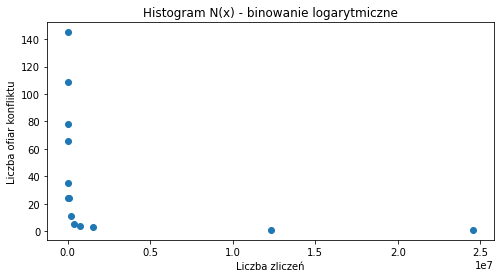

In [6]:
a=2
x0=min(points)
x_max=max(points)
bins=[]
current_bin=[x0,x0*a]
bins.append(current_bin)
while current_bin[1]<=x_max:
    x0=current_bin[1]
    current_bin=[x0,x0*a]
    bins.append(current_bin)

yl=[]
xl=[]
for bi in bins:
    mid=bi[0]+(bi[1]-bi[0])/2
    suma=0
    for p in points:
        if p>=bi[0] and p<bi[1]:
            suma+=1
    if suma>0:
        xl.append(mid)
        yl.append(suma)
print(xl,yl)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xl,yl)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.title("Histogram N(x) - binowanie logarytmiczne")
plt.xlabel('Liczba zliczeń')
plt.ylabel('Liczba ofiar konfliktu')
plt.rcParams['savefig.facecolor']='white'
plt.savefig("linlin_biny2.png")

PRAWDOPODOBIEŃSTWA:

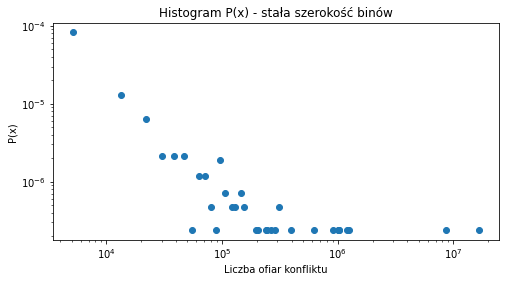

In [24]:
yP=[]
xP=[]
for bi in wonky:
    mid=bi[0]+(bi[1]-bi[0])/2
    suma=0
    for p in points:
        if p>=bi[0] and p<bi[1]:
            suma+=1
    xP.append(mid)
    yP.append(suma)
#print(xP,yP)
N=sum(yP)
#print(N)
prob_y=[]
prob_x=[]
for i in range(len(wonky)):
    width=wonky[i][1]-wonky[i][0]
    prob=yP[i]/(N*width)
    if prob>0:
        prob_y.append(prob)
        prob_x.append(xP[i])
#print(prob_y)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(prob_x,prob_y)
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Histogram P(x) - stała szerokość binów")
plt.ylabel('P(x)')
plt.xlabel('Liczba ofiar konfliktu')
plt.rcParams['savefig.facecolor']='white'
plt.savefig("loglog_prawd.png")

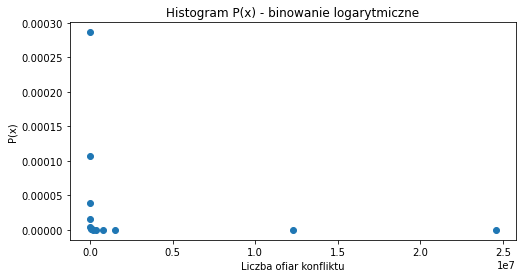

In [21]:
yPl=[]
xPl=[]
for bi in bins:
    mid=bi[0]+(bi[1]-bi[0])/2
    suma=0
    for p in points:
        if p>=bi[0] and p<bi[1]:
            suma+=1
    xPl.append(mid)
    yPl.append(suma)
#print(xPl,yPl)
N=sum(yPl)
#print(N)
prob_yl=[]
prob_xl=[]
for i in range(len(bins)):
    width=bins[i][1]-bins[i][0]
    prob=yPl[i]/(N*width)
    if prob>0:
        prob_yl.append(prob)
        prob_xl.append(xPl[i])
#print(prob_yl)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(prob_xl,prob_yl)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.title("Histogram P(x) - binowanie logarytmiczne")
plt.ylabel('P(x)')
plt.xlabel('Liczba ofiar konfliktu')
plt.rcParams['savefig.facecolor']='white'
plt.savefig("linlin_prawd2.png")

ROZKŁAD SKUMULOWANY

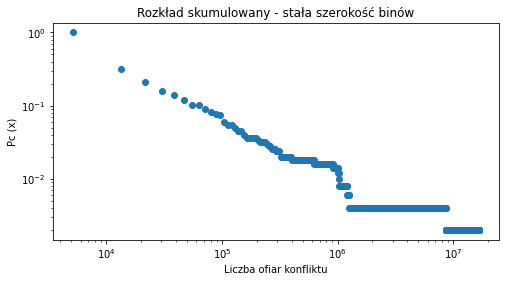

In [81]:
yP=np.array(yP)
pdf = yP/sum(yP)
pdf=list(pdf)
pdf.reverse()

cdf_invert = np.cumsum(pdf)
cdf_invert=list(cdf_invert)
cdf_invert.reverse()
cdf=cdf_invert
  
# plotting PDF and CDF
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xP, cdf, label="CDF")
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Rozkład skumulowany - stała szerokość binów")
plt.ylabel('Pc (x)')
plt.xlabel('Liczba ofiar konfliktu')
plt.rcParams['savefig.facecolor']='white'
plt.savefig("pc_1_loglog.png")

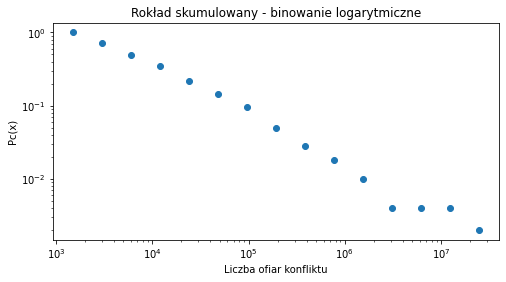

In [78]:
yPl=np.array(yPl)
pdf = yPl/sum(yPl)
pdf=list(pdf)
pdf.reverse()

cdf_invert = np.cumsum(pdf)
cdf_invert=list(cdf_invert)
cdf_invert.reverse()
cdf=cdf_invert
  
# plotting PDF and CDF
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xPl, cdf, label="CDF")
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Rokład skumulowany - binowanie logarytmiczne")
plt.ylabel('Pc(x)')
plt.xlabel('Liczba ofiar konfliktu')
plt.rcParams['savefig.facecolor']='white'
plt.savefig("pc_2_loglog.png")